In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df_list = []

file_in = "raw_data/wells"

for i in range(1,62):
    a = str(i)
    temp = pd.read_excel(file_in + a + ".xlsx")
    df_list.append(temp)
    
df = pd.concat(df_list)


In [3]:
df = df.drop_duplicates()

In [4]:
df.isna().sum()

Registry No. (55-)         0
GWSI Site ID           18810
Cadastral                  0
Owner Name                68
Well Type                  0
Well Depth (ft)         2482
Casing Depth (ft)       2680
Case Dia (in)           2618
Drill Date              6757
Applicaiton Date          32
Water Level (ft)        2983
Pump Capacity (GPM)     6851
Pump Data Available        0
Completion Report      15998
Log Received           12396
dtype: int64

In [13]:
df.dtypes

Registry No. (55-)              int64
GWSI Site ID                  float64
Cadastral                      object
Owner Name                     object
Well Type                      object
Well Depth (ft)               float64
Casing Depth (ft)             float64
Case Dia (in)                 float64
Drill Date                     object
Applicaiton Date       datetime64[ns]
Water Level (ft)              float64
Pump Capacity (GPM)           float64
Pump Data Available            object
Completion Report              object
Log Received                   object
dtype: object

In [5]:
df = df.dropna(subset=['Well Depth (ft)'])
df = df.dropna(subset=['Drill Date'])

# we shouldn't have well depth of 0.
df = df.loc[df['Well Depth (ft)'] != 0]

In [15]:
# Change Drill Date column to datetime type
df['Drill Date'] = pd.to_datetime(df['Drill Date'], errors = 'coerce')

# Create new column to express the year drilled:
df['Year'] = df['Drill Date'].dt.year
    

In [27]:
df.head()

,Registry No. (55-),GWSI Site ID,Cadastral,Owner Name,Well Type,Well Depth (ft),Casing Depth (ft),Case Dia (in),Drill Date,Applicaiton Date,Water Level (ft),Pump Capacity (GPM),Pump Data Available,Completion Report,Log Received,Year
0,87026,NaN,D14031010CAB,"KRACHE, DENNIS,",NON-EXEMPT,85.0,85.0,16.0,1981-01-01,1997-09-24,40.0,0.0,NO,NaN,NaN,1981.0
1,204440,NaN,D13031030CCC,ARIZONA DEPARTMENT OF ENVIRONMENTAL QUALITY,MONITOR,80.0,80.0,2.0,2004-07-28,2004-07-21,55.0,NaN,NO,NaN,X,2004.0
2,209499,NaN,D14031004AAD,FICO SS FARMS LLC,NON-EXEMPT,1011.0,1011.0,12.0,2006-06-19,2005-09-30,335.0,NaN,NO,NaN,X,2006.0
3,211737,NaN,D13031029AAC,BRIAN & GERILINE DRISCOLL,NON-EXEMPT,740.0,740.0,6.0,2007-02-07,2006-04-10,90.0,200.0,NO,X,X,2007.0
4,220279,3.214101e+14,D14031010ABA,FORT BOWIE RANCHES,EXEMPT,540.0,540.0,8.0,2011-01-23,2010-12-09,160.0,NaN,NO,NaN,X,2011.0


In [25]:
df1980 = df[df['Year'] >= 1980]

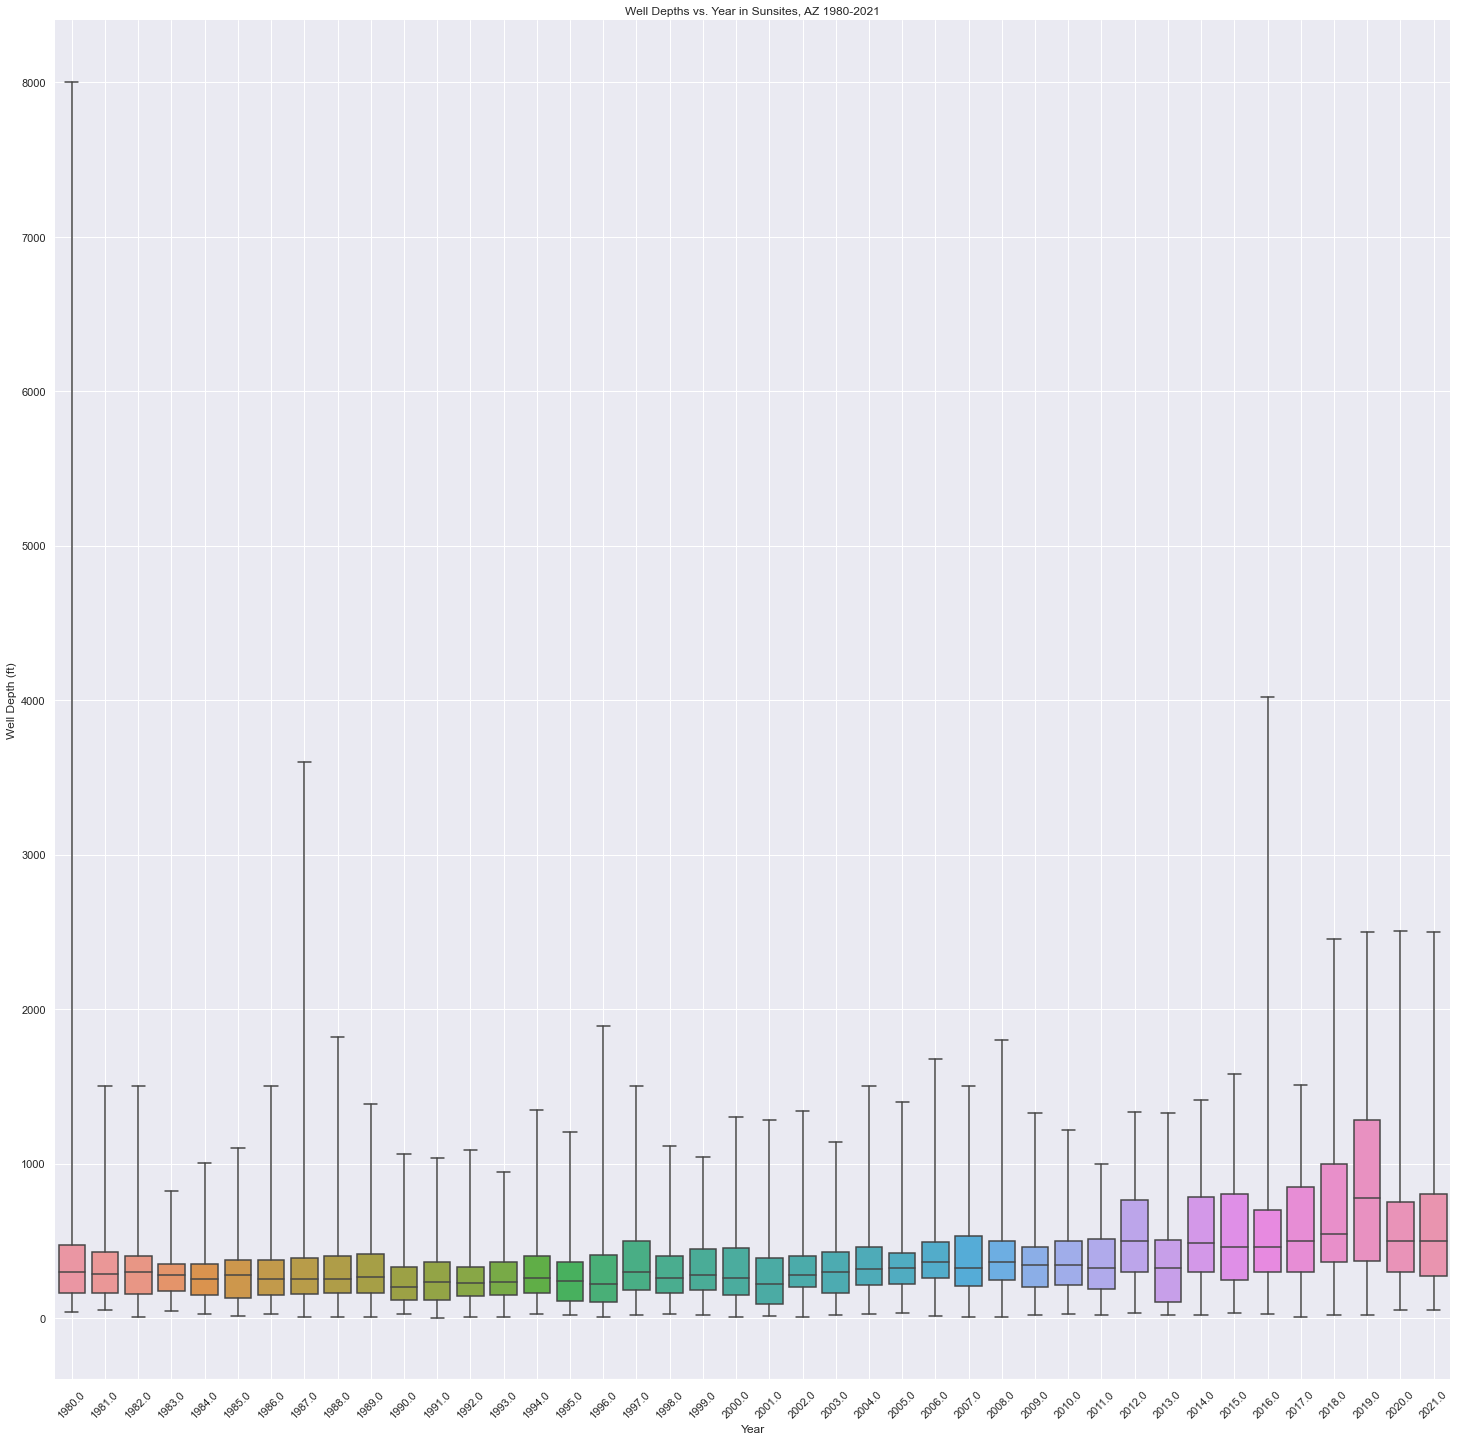

In [26]:
fig, ax = plt.subplots(figsize=(25,25))

sns.boxplot(x=df1980['Year'], y=df1980['Well Depth (ft)'], data=df1980, whis=[0,100])
ax.set_title("Well Depths vs. Year in Sunsites, AZ 1980-2021")
ax.set_ylabel("Well Depth (ft)")
ax.set_xlabel("Year")
sns.set(font_scale=1)
ax.xaxis.grid(True)
plt.xticks(rotation=45)
sns.despine(trim=True, left=True)

plt.show()